# Data Set
This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID
- Rated (T/F)
- Start Time
- End Time
- Number of Turns
- Game Status
-  Winner
- Time Increment
- White Player ID
- White Player Rating
- Black Player ID
- Black Player Rating
- All Moves in Standard Chess Notation
- Opening Eco (Standardised Code for any given opening, list here)
- Opening Name
- Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. 
The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

# Possible Uses

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.


# Analysis Questions:

1. What is the best opening?
2. The effect of Rated games on Resign?
3. The Heights rating win the chess game?
4. The effect of games time the results?
5. Evaluation of the player selection Algorithms.
6. Games Distribution throughout the day.

Importing Required Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Read Dataset From CSV File

In [2]:
raw_df=pd.read_csv(r'D:\Books and courses\Courses\Machine Learning\Data Projects\Chess (Lichess)\games.csv')
raw_df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


--------------------------
# Data Preprocessing


Change Columns Name

In [3]:
raw_df.columns=raw_df.columns.str.replace('rated','Game Type')

Replace _ with Space in Columns Name

In [4]:
columns=[i.replace('_',' ') for i in raw_df.columns]

capitalize the first letter of each word 

In [5]:
raw_df.columns=[i.title() for i in columns]
raw_df.columns=raw_df.columns.str.replace('Opening Eco','Opening ECO')

---------------
# Data Exploration


The Shape of DataFrame

In [6]:
raw_df.shape

(20058, 16)

In [7]:
raw_df.describe()

,Created At,Last Move At,Turns,White Rating,Black Rating,Opening Ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Raw DataFrame Info 

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              20058 non-null  object 
 1   Game Type       20058 non-null  bool   
 2   Created At      20058 non-null  float64
 3   Last Move At    20058 non-null  float64
 4   Turns           20058 non-null  int64  
 5   Victory Status  20058 non-null  object 
 6   Winner          20058 non-null  object 
 7   Increment Code  20058 non-null  object 
 8   White Id        20058 non-null  object 
 9   White Rating    20058 non-null  int64  
 10  Black Id        20058 non-null  object 
 11  Black Rating    20058 non-null  int64  
 12  Moves           20058 non-null  object 
 13  Opening ECO     20058 non-null  object 
 14  Opening Name    20058 non-null  object 
 15  Opening Ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


Rating Difference Between Players

In [9]:
raw_df['Rating Difference']=np.abs(raw_df['White Rating']-raw_df['Black Rating'])

Visualizing statistics plots

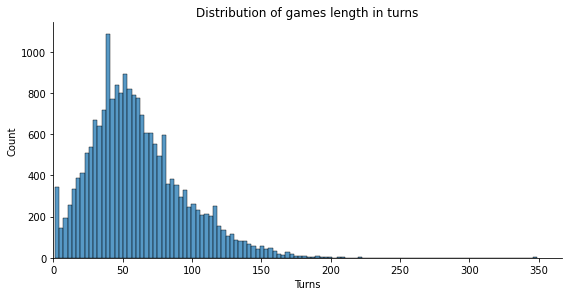

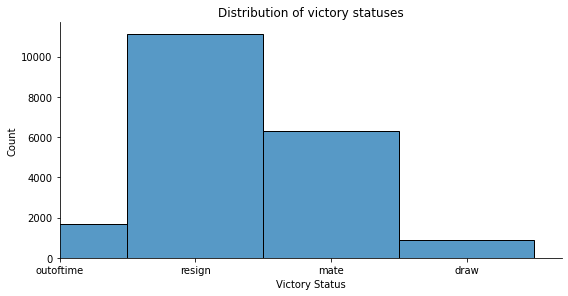

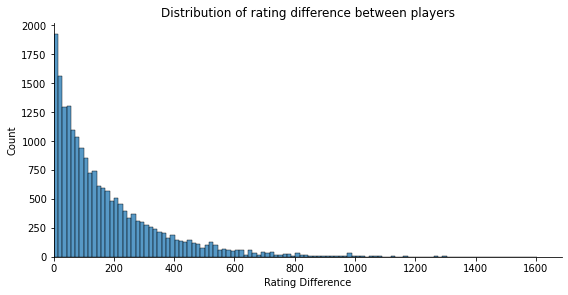

In [10]:
A=['Turns','Victory Status', 'Rating Difference']
B=['Distribution of games length in turns', 'Distribution of victory statuses','Distribution of rating difference between players']

variables=zip(A,B)
for var, title in variables :
    sns.displot(
        raw_df[var],
        height=4, 
        aspect=2
    )
    plt.title(title)
    plt.xlim((0))
    plt.ylim((0))
    plt.show()


Exploration Notes 
-------------------
1. No Missing Data (GOOD ^_^ ).
2. More Than 50% of Games end with Resign, Why?
3. I Think the Rating Difference Distribution is Acceptable  the Algorithms tried to Reduce it.
4. There are Games with High Turns Rate or High Duration (Outliers) can mislead the ML Algorithm in future.
5. Game Type Columns is Bool type.
6. The Columns of Creation Have The Same Values of Last Move
7. Moves Column is Unnecessary

--------------------------
# Dropping Invalid Data


Make A Copy of the DataFrame

In [11]:
df=raw_df.copy()
df.shape

(20058, 17)

Drop the Unnecessary Data Such as Moves

In [12]:
df.drop(['Moves','Id','Opening Ply'],axis=1,inplace=True)

Drop Duplicated Samples

In [13]:
df.drop_duplicates(inplace=True)

----------------------------------
# Data Processing


Get the Date and Time

In [14]:
df['Date']=pd.to_datetime(df['Last Move At'], unit='ms').dt.strftime('%Y-%m-%d')
df['Time']=pd.to_datetime(df['Last Move At'], unit='ms').dt.strftime('%H:%M:%S')

Game Duartion and its Freq

In [15]:
df['Duration']=pd.to_datetime(df['Last Move At']-df['Created At'], unit='ms').dt.strftime('%H:%M:%S')

In [16]:
df['Duration'].value_counts()

00:00:00    8533
02:46:40     732
00:00:06      23
00:00:04      23
00:09:12      20
            ... 
00:53:58       1
00:23:49       1
00:21:57       1
00:45:37       1
01:07:22       1
Name: Duration, Length: 2311, dtype: int64

Convert outoftime in Victory to OFT

In [17]:
df['Victory Status']=df['Victory Status'].str.replace('outoftime','OFT')

--------------------------

# Notes
1. Around 50% of Games Duration is 00:00:00 (So this Column is invalid Data).
2. Instead of Duration I will Use Creation Data and Time 

---------------------------
# Data Processing #2


Dropping Some Unnecessary Columns

In [18]:
df.drop(['Duration','Last Move At','Created At'], axis=1 ,inplace=True)
df.head()

,Game Type,Turns,Victory Status,Winner,Increment Code,White Id,White Rating,Black Id,Black Rating,Opening ECO,Opening Name,Rating Difference,Date,Time
0,False,13,OFT,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,309,2017-08-31,20:06:40
1,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,2017-08-30,21:53:20
2,True,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,4,2017-08-30,21:53:20
3,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,15,2017-08-30,16:20:00
4,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,54,2017-08-29,18:06:40


Reset the Index of DataFrame

In [19]:
df=df.reset_index()
df.columns=df.columns.str.replace('index','Games')

Convert Game Type from Bool to String 

In [20]:
df['Game Type'].replace(True,'Rated',inplace=True)
df['Game Type'].replace(False,'Unrated',inplace=True)

Remove Turns more than 250 ( I Conside them as outliers Although these Cases can be real, they can happen)

In [21]:
df=df.drop(df[df['Turns']>250].index)
df=df.drop(df[df['Turns']<=3].index)

Create Winner Id Column

In [22]:
A=df.groupby('Winner').groups   
df['BW Id']=df.loc[A['black'],['Black Id']]
df['WW Id']=df.loc[A['white'],['White Id']]
df=df.replace('NaN',np.nan)
df=df.fillna(method='bfill' , axis=1 )
df.head()

,Games,Game Type,Turns,Victory Status,Winner,Increment Code,White Id,White Rating,Black Id,Black Rating,Opening ECO,Opening Name,Rating Difference,Date,Time,BW Id,WW Id
0,0,Unrated,13,OFT,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,309,2017-08-31,20:06:40,bourgris,bourgris
1,1,Rated,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,2017-08-30,21:53:20,skinnerua,NaN
2,2,Rated,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,4,2017-08-30,21:53:20,ischia,ischia
3,3,Rated,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,15,2017-08-30,16:20:00,daniamurashov,daniamurashov
4,4,Rated,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,54,2017-08-29,18:06:40,nik221107,nik221107


In [23]:
A

{'black': [1, 7, 8, 11, 12, 13, 15, 16, 17, 18, 20, 24, 27, 28, 29, 30, 31, 33, 35, 37, 41, 50, 53, 57, 58, 60, 62, 64, 67, 69, 70, 72, 73, 78, 79, 83, 87, 88, 89, 93, 94, 104, 105, 109, 110, 111, 112, 114, 116, 117, 118, 120, 122, 124, 125, 127, 128, 129, 131, 133, 134, 139, 147, 148, 149, 151, 154, 159, 163, 169, 170, 171, 172, 173, 175, 177, 178, 180, 184, 186, 187, 188, 189, 190, 191, 192, 193, 196, 198, 199, 200, 203, 207, 208, 209, 210, 215, 216, 217, 218, ...], 'draw': [5, 40, 98, 126, 143, 176, 181, 220, 227, 239, 269, 291, 301, 319, 326, 350, 360, 370, 376, 382, 406, 433, 440, 446, 451, 465, 476, 487, 516, 552, 576, 577, 584, 600, 634, 756, 757, 761, 769, 792, 825, 830, 852, 868, 945, 946, 947, 948, 949, 954, 955, 957, 1013, 1022, 1079, 1125, 1148, 1151, 1164, 1185, 1199, 1206, 1219, 1249, 1265, 1326, 1335, 1384, 1392, 1399, 1418, 1443, 1444, 1447, 1494, 1503, 1527, 1532, 1547, 1581, 1594, 1613, 1642, 1661, 1684, 1685, 1686, 1733, 1757, 1774, 1789, 1810, 1823, 1828, 1849, 1850

Change Column Name and Drop Unnecessary Columns


In [24]:
df.columns=df.columns.str.replace('BW Id','Winner Id')
df.drop('WW Id', axis=1, inplace=True)
df.head()

,Games,Game Type,Turns,Victory Status,Winner,Increment Code,White Id,White Rating,Black Id,Black Rating,Opening ECO,Opening Name,Rating Difference,Date,Time,Winner Id
0,0,Unrated,13,OFT,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,309,2017-08-31,20:06:40,bourgris
1,1,Rated,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,61,2017-08-30,21:53:20,skinnerua
2,2,Rated,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,4,2017-08-30,21:53:20,ischia
3,3,Rated,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,15,2017-08-30,16:20:00,daniamurashov
4,4,Rated,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,54,2017-08-29,18:06:40,nik221107


In [25]:
df['Victory Status'].value_counts()

resign    10706
mate       6188
OFT        1588
draw        860
Name: Victory Status, dtype: int64

Grouping Game Type

In [26]:
df_Rated=df.groupby('Game Type').get_group('Rated')
df_Unrated=df.groupby('Game Type').get_group('Unrated')

Grouping According to Victory

In [27]:
df_Resign=df.groupby('Victory Status').get_group('resign')
df_Mate=df.groupby('Victory Status').get_group('mate')
df_OutOfTime=df.groupby('Victory Status').get_group('OFT')
df_Draw=df.groupby('Victory Status').get_group('draw')

# Finish The Processing and Saving Files


Saving Full DataFrame

In [28]:
df.to_csv('Full Data.csv')

Saving Game Type

In [29]:
df_Rated.to_csv('Rated Games.csv')
df_Unrated.to_csv('Unrated Games.csv')

Saving Visctory State

In [30]:
df_Resign.to_csv('Resign_games.csv')
df_Mate.to_csv('Mate_games.csv')
df_OutOfTime.to_csv('OutOfTime_games.csv')
df_Draw.to_csv('Draw_games.csv')

# visualization (Power BI)